TASK #2: IMPORT LIBRARIES AND DATASETS

In [1]:
!pip install --upgrade tensorflow-gpu==

ERROR: Could not find a version that satisfies the requirement tensorflow-gpu== (from versions: 1.2.0, 1.2.1, 1.3.0, 1.4.0, 1.5.0, 1.5.1, 1.6.0, 1.7.0, 1.7.1, 1.8.0, 1.9.0, 1.10.0, 1.11.0, 1.12.0, 1.12.2, 1.12.3, 1.13.1, 1.13.2, 1.14.0, 1.15.0rc0, 1.15.0rc1, 1.15.0rc2, 1.15.0rc3, 1.15.0, 1.15.2, 1.15.3, 1.15.4, 1.15.5, 2.0.0a0, 2.0.0b0, 2.0.0b1, 2.0.0rc0, 2.0.0rc1, 2.0.0rc2, 2.0.0, 2.0.1, 2.0.2, 2.0.3, 2.0.4, 2.1.0rc0, 2.1.0rc1, 2.1.0rc2, 2.1.0, 2.1.1, 2.1.2, 2.1.3, 2.1.4, 2.2.0rc0, 2.2.0rc1, 2.2.0rc2, 2.2.0rc3, 2.2.0rc4, 2.2.0, 2.2.1, 2.2.2, 2.2.3, 2.3.0rc0, 2.3.0rc1, 2.3.0rc2, 2.3.0, 2.3.1, 2.3.2, 2.3.3, 2.4.0rc0, 2.4.0rc1, 2.4.0rc2, 2.4.0rc3, 2.4.0rc4, 2.4.0, 2.4.1, 2.4.2, 2.5.0rc0, 2.5.0rc1, 2.5.0rc2, 2.5.0rc3, 2.5.0, 2.6.0rc0)
ERROR: No matching distribution found for tensorflow-gpu==


In [2]:
!pip install jupyterthemes
!pip install plotly
!pip install --upgrade nbformat
!pip install nltk
!pip install spacy # spaCy is an open-source software library for advanced natural language processing
!pip install WordCloud
!pip install gensim # Gensim is an open-source library for unsupervised topic modeling and natural language processing
!pip install jupyterthemes
import nltk
nltk.download('punkt')

import os
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
# import keras
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional
from tensorflow.keras.models import Model
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 


ERROR: Invalid requirement: '#'


ERROR: Invalid requirement: '#'


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Jenkir\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
C:\Users\Jenkir\anaconda3\envs\PythonAdv\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [3]:
# Dependencies to Visualize the model
%matplotlib inline
from IPython.display import Image, SVG
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)

In [4]:
# Sklearn scaling
from sklearn.preprocessing import MinMaxScaler

In [5]:
# Keras
from tensorflow import keras
#from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
#from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist

In [6]:
# !wget https://jdbc.postgresql.org/download/postgresql-42.2.9.jar

In [7]:
# !pip install pyspark

In [8]:
# from pyspark.sql import SparkSession
# spark = SparkSession.builder.appName("CloudETL").config("spark.driver.extraClassPath","/content/postgresql-42.2.9.jar").getOrCreate()

In [9]:
# from pyspark import SparkFiles

In [10]:
# Load in Fake datasets from S3 into a DataFrame
# url_fake ="https://final-project-data-rjj.s3.us-east-2.amazonaws.com/Fake.csv"
# spark.sparkContext.addFile(url_fake)

In [11]:
# Load in True datasets from S3 into a DataFrame
# url_true = "https://final-project-data-rjj.s3.us-east-2.amazonaws.com/True.csv"
# spark.sparkContext.addFile(url_true)

In [12]:
df_true = pd.read_csv("https://final-project-data-rjj.s3.us-east-2.amazonaws.com/True.csv")
df_true.head(10)

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   
5  White House, Congress prepare for talks on spe...   
6  Trump says Russia probe will be fair, but time...   
7  Factbox: Trump on Twitter (Dec 29) - Approval ...   
8         Trump on Twitter (Dec 28) - Global Warming   
9  Alabama official to certify Senator-elect Jone...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   
5  WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...  politicsNews   
6  WEST PALM BEACH, Fla (Reuters) - President Don...  politicsNews   
7  The following statements were posted to the ve...  politicsNews   
8  The following statements were posted to the ve...  politicsNews   
9  WASHINGTON (Reuters) - Alabama Secretary of St...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017   
5  December 29, 2017   
6  December 29, 2017   
7  December 29, 2017   
8  December 29, 2017   
9  December 28, 2017

In [13]:
df_fake = pd.read_csv("https://final-project-data-rjj.s3.us-east-2.amazonaws.com/Fake.csv")
df_fake.head(10)

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   
5   Racist Alabama Cops Brutalize Black Boy While...   
6   Fresh Off The Golf Course, Trump Lashes Out A...   
7   Trump Said Some INSANELY Racist Stuff Inside ...   
8   Former CIA Director Slams Trump Over UN Bully...   
9   WATCH: Brand-New Pro-Trump Ad Features So Muc...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   
5  The number of cases of cops brutalizing and ki...    News   
6  Donald Trump spent a good portion of his day a...    News   
7  In the wake of yet another court decision that...    News   
8  Many people have raised the alarm regarding th...    News   
9  Just when you might have thought we d get a br...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017  
5  December 25, 2017  
6  December 23, 2017  
7  December 23, 2017  
8  December 22, 2017  
9  December 21, 2017

In [14]:
df_true.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [15]:
df_fake.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [16]:
# memory usage-fake
df_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [17]:
# memory usage-true
df_true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


TASK # 3 - PERFORM EXPLORATORY DATA ANALYSIS

In [18]:
# add a target class column to indicate whether the news is real or fake
df_true['target'] = "true"
#df_true.drop(['isfake'], axis =1, inplace=True)
df_true.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date target  
0  December 31, 2017    true  
1  December 29, 2017    true  
2  December 31, 2017    true  
3  December 30, 2017    true  
4  December 29, 2017    true

In [19]:
df_fake['target'] = "fake"
#df_fake.drop(['isfake'], axis =1, inplace=True)
df_fake.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date target  
0  December 31, 2017   fake  
1  December 31, 2017   fake  
2  December 30, 2017   fake  
3  December 29, 2017   fake  
4  December 25, 2017   fake

In [20]:
# Concatenate Real and Fake News datasets
df = pd.concat([df_true, df_fake]).reset_index(drop = True)
df

title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
44893  McPain: John McCain Furious That Iran Treated ...   
44894  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
44895  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   
44896  How to Blow $700 Million: Al Jazeera America F...   
44897  10 U.S. Navy Sailors Held by Iranian Military ...   

                                                    text       subject  \
0      WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1      WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2      WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3      WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4      SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   
...                                                  ...           ...   
44893  21st Century Wire says As 21WIRE reported earl...   Middle-east   
44894  21st Century Wire says It s a familiar theme. ...   Middle-east   
44895  Patrick Henningsen  21st Century WireRemember ...   Middle-east   
44896  21st Century Wire says Al Jazeera America will...   Middle-east   
44897  21st Century Wire says As 21WIRE predicted in ...   Middle-east   

                     date target  
0      December 31, 2017    true  
1      December 29, 2017    true  
2      December 31, 2017    true  
3      December 30, 2017    true  
4      December 29, 2017    true  
...                   ...    ...  
44893    January 16, 2016   fake  
44894    January 16, 2016   fake  
44895    January 15, 2016   fake  
44896    January 14, 2016   fake  
44897    January 12, 2016   fake  

[44898 rows x 5 columns]

In [21]:
# combine title and text together
df['original'] = df['title'] + ' ' + df['text']
df.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date target  \
0  December 31, 2017    true   
1  December 29, 2017    true   
2  December 31, 2017    true   
3  December 30, 2017    true   
4  December 29, 2017    true   

                                            original  
0  As U.S. budget fight looms, Republicans flip t...  
1  U.S. military to accept transgender recruits o...  
2  Senior U.S. Republican senator: 'Let Mr. Muell...  
3  FBI Russia probe helped by Australian diplomat...  
4  Trump wants Postal Service to charge 'much mor...

In [22]:
df['original'][0]

'As U.S. budget fight looms, Republicans flip their fiscal script WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non

TASK #4: PERFORM DATA CLEANING

In [23]:
# download stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jenkir\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [24]:
# Obtain additional stopwords from nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [25]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [26]:
# Remove stopwords and remove words with 2 or less characters
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3 and token not in stop_words:
            result.append(token)
            
    return result

In [27]:
# Apply the function to the dataframe
df['clean'] = df['original'].apply(preprocess)

In [28]:
df

title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
44893  McPain: John McCain Furious That Iran Treated ...   
44894  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
44895  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   
44896  How to Blow $700 Million: Al Jazeera America F...   
44897  10 U.S. Navy Sailors Held by Iranian Military ...   

                                                    text       subject  \
0      WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1      WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2      WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3      WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4      SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   
...                                                  ...           ...   
44893  21st Century Wire says As 21WIRE reported earl...   Middle-east   
44894  21st Century Wire says It s a familiar theme. ...   Middle-east   
44895  Patrick Henningsen  21st Century WireRemember ...   Middle-east   
44896  21st Century Wire says Al Jazeera America will...   Middle-east   
44897  21st Century Wire says As 21WIRE predicted in ...   Middle-east   

                     date target  \
0      December 31, 2017    true   
1      December 29, 2017    true   
2      December 31, 2017    true   
3      December 30, 2017    true   
4      December 29, 2017    true   
...                   ...    ...   
44893    January 16, 2016   fake   
44894    January 16, 2016   fake   
44895    January 15, 2016   fake   
44896    January 14, 2016   fake   
44897    January 12, 2016   fake   

                                                original  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
44893  McPain: John McCain Furious That Iran Treated ...   
44894  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
44895  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   
44896  How to Blow $700 Million: Al Jazeera America F...   
44897  10 U.S. Navy Sailors Held by Iranian Military ...   

                                                   clean  
0      [budget, fight, looms, republicans, flip, fisc...  
1      [military, accept, transgender, recruits, mond...  
2      [senior, republican, senator, mueller, washing...  
3      [russia, probe, helped, australian, diplomat, ...  
4      [trump, wants, postal, service, charge, amazon...  
...                                                  ...  
44893  [mcpain, john, mccain, furious, iran, treated,...  
44894  [justice, yahoo, settles, mail, privacy, class...  
44895  [sunnistan, allied, safe, zone, plan, territor...  
44896  [blow, million, jazeera, america, finally, cal...  
44897  [navy, sailors, held, iranian, military, signs...  

[44898 rows x 7 columns]

In [29]:
# Show original news
df['original'][0]

'As U.S. budget fight looms, Republicans flip their fiscal script WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non

In [30]:
# Show cleaned up news after removing stopwords
print(df['clean'][0])

['budget', 'fight', 'looms', 'republicans', 'flip', 'fiscal', 'script', 'washington', 'reuters', 'head', 'conservative', 'republican', 'faction', 'congress', 'voted', 'month', 'huge', 'expansion', 'national', 'debt', 'cuts', 'called', 'fiscal', 'conservative', 'sunday', 'urged', 'budget', 'restraint', 'keeping', 'sharp', 'pivot', 'republicans', 'representative', 'mark', 'meadows', 'speaking', 'face', 'nation', 'drew', 'hard', 'line', 'federal', 'spending', 'lawmakers', 'bracing', 'battle', 'january', 'return', 'holidays', 'wednesday', 'lawmakers', 'begin', 'trying', 'pass', 'federal', 'budget', 'fight', 'likely', 'linked', 'issues', 'immigration', 'policy', 'november', 'congressional', 'election', 'campaigns', 'approach', 'republicans', 'seek', 'control', 'congress', 'president', 'donald', 'trump', 'republicans', 'want', 'budget', 'increase', 'military', 'spending', 'democrats', 'want', 'proportional', 'increases', 'defense', 'discretionary', 'spending', 'programs', 'support', 'educati

In [31]:
# Obtain the total words present in the dataset
list_of_words = []
for i in df.clean:
    for j in i:
        list_of_words.append(j)

In [32]:
list_of_words

['budget',
 'fight',
 'looms',
 'republicans',
 'flip',
 'fiscal',
 'script',
 'washington',
 'reuters',
 'head',
 'conservative',
 'republican',
 'faction',
 'congress',
 'voted',
 'month',
 'huge',
 'expansion',
 'national',
 'debt',
 'cuts',
 'called',
 'fiscal',
 'conservative',
 'sunday',
 'urged',
 'budget',
 'restraint',
 'keeping',
 'sharp',
 'pivot',
 'republicans',
 'representative',
 'mark',
 'meadows',
 'speaking',
 'face',
 'nation',
 'drew',
 'hard',
 'line',
 'federal',
 'spending',
 'lawmakers',
 'bracing',
 'battle',
 'january',
 'return',
 'holidays',
 'wednesday',
 'lawmakers',
 'begin',
 'trying',
 'pass',
 'federal',
 'budget',
 'fight',
 'likely',
 'linked',
 'issues',
 'immigration',
 'policy',
 'november',
 'congressional',
 'election',
 'campaigns',
 'approach',
 'republicans',
 'seek',
 'control',
 'congress',
 'president',
 'donald',
 'trump',
 'republicans',
 'want',
 'budget',
 'increase',
 'military',
 'spending',
 'democrats',
 'want',
 'proportional',
 '

In [33]:
len(list_of_words)

9276947

In [34]:
# Obtain the total number of unique words
total_words = len(list(set(list_of_words)))
total_words

108704

In [35]:
# join the words into a string
df['clean_joined'] = df['clean'].apply(lambda x: " ".join(x))

In [36]:
df

title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
44893  McPain: John McCain Furious That Iran Treated ...   
44894  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
44895  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   
44896  How to Blow $700 Million: Al Jazeera America F...   
44897  10 U.S. Navy Sailors Held by Iranian Military ...   

                                                    text       subject  \
0      WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1      WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2      WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3      WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4      SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   
...                                                  ...           ...   
44893  21st Century Wire says As 21WIRE reported earl...   Middle-east   
44894  21st Century Wire says It s a familiar theme. ...   Middle-east   
44895  Patrick Henningsen  21st Century WireRemember ...   Middle-east   
44896  21st Century Wire says Al Jazeera America will...   Middle-east   
44897  21st Century Wire says As 21WIRE predicted in ...   Middle-east   

                     date target  \
0      December 31, 2017    true   
1      December 29, 2017    true   
2      December 31, 2017    true   
3      December 30, 2017    true   
4      December 29, 2017    true   
...                   ...    ...   
44893    January 16, 2016   fake   
44894    January 16, 2016   fake   
44895    January 15, 2016   fake   
44896    January 14, 2016   fake   
44897    January 12, 2016   fake   

                                                original  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
44893  McPain: John McCain Furious That Iran Treated ...   
44894  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
44895  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   
44896  How to Blow $700 Million: Al Jazeera America F...   
44897  10 U.S. Navy Sailors Held by Iranian Military ...   

                                                   clean  \
0      [budget, fight, looms, republicans, flip, fisc...   
1      [military, accept, transgender, recruits, mond...   
2      [senior, republican, senator, mueller, washing...   
3      [russia, probe, helped, australian, diplomat, ...   
4      [trump, wants, postal, service, charge, amazon...   
...                                                  ...   
44893  [mcpain, john, mccain, furious, iran, treated,...   
44894  [justice, yahoo, settles, mail, privacy, class...   
44895  [sunnistan, allied, safe, zone, plan, territor...   
44896  [blow, million, jazeera, america, finally, cal...   
44897  [navy, sailors, held, iranian, military, signs...   

                                            clean_joined  
0      budget fight looms republicans flip fiscal scr...  
1      military accept transgender recruits monday pe...  
2      senior republican senator mueller washington r...  
3      russia probe helped australian diplomat washin...  
4      trump wants postal service charge amazon shipm...  
...                                                  ...  
44893  mcpain john mccain furious iran treated sailor...  
44894  justice yahoo settles mail privacy class actio...  
44895  sunnistan allied safe zone p

In [37]:
df['clean_joined'][0]

'budget fight looms republicans flip fiscal script washington reuters head conservative republican faction congress voted month huge expansion national debt cuts called fiscal conservative sunday urged budget restraint keeping sharp pivot republicans representative mark meadows speaking face nation drew hard line federal spending lawmakers bracing battle january return holidays wednesday lawmakers begin trying pass federal budget fight likely linked issues immigration policy november congressional election campaigns approach republicans seek control congress president donald trump republicans want budget increase military spending democrats want proportional increases defense discretionary spending programs support education scientific research infrastructure public health environmental protection trump administration willing going increase defense discretionary spending percent meadows chairman small influential house freedom caucus said program democrats saying need government raise 

In [38]:
df['clean_joined'][10]

'jones certified senate winner despite moore challenge reuters alabama officials thursday certified democrat doug jones winner state senate race state judge denied challenge republican moore campaign derailed accusations sexual misconduct teenage girls jones vacant seat votes percentage points election officials said democrat quarter century senate seat alabama seat previously held republican jeff sessions tapped president donald trump attorney general state canvassing board composed alabama secretary state john merrill governor ivey attorney general steve marshall certified election results seating jones narrow republican majority senate seats statement jones called victory chapter pledged work parties moore declined concede defeat trump urged stood claims fraudulent election statement released certification said regrets media outlets reported alabama judge denied moore request block certification results election decision shortly canvassing board moore challenge alleged potential vot

In [39]:
df['clean_joined'][20]

'federal judge partially lifts trump latest refugee restrictions washington reuters federal judge seattle partially blocked president donald trump newest restrictions refugee admissions saturday latest legal defeat efforts curtail immigration travel united states decision district judge james robart judicial curb rules trump administration place late october contributed significantly precipitous drop number refugees admitted country refugees groups assist argued court administration policies violated constitution federal rulemaking procedures claims department justice attorneys argued grants executive branch authority limit refugee admissions trump administration effectively paused refugee admissions countries middle east africa pending security review expire late january countries review egypt iran iraq libya mali north korea somalia south sudan sudan syria yemen years refugees countries percent admissions reuters review state department data showed review went effect refugee admissio

TASK #5: VISUALIZE CLEANED UP DATASET

In [40]:
df

title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
44893  McPain: John McCain Furious That Iran Treated ...   
44894  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
44895  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   
44896  How to Blow $700 Million: Al Jazeera America F...   
44897  10 U.S. Navy Sailors Held by Iranian Military ...   

                                                    text       subject  \
0      WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1      WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2      WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3      WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4      SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   
...                                                  ...           ...   
44893  21st Century Wire says As 21WIRE reported earl...   Middle-east   
44894  21st Century Wire says It s a familiar theme. ...   Middle-east   
44895  Patrick Henningsen  21st Century WireRemember ...   Middle-east   
44896  21st Century Wire says Al Jazeera America will...   Middle-east   
44897  21st Century Wire says As 21WIRE predicted in ...   Middle-east   

                     date target  \
0      December 31, 2017    true   
1      December 29, 2017    true   
2      December 31, 2017    true   
3      December 30, 2017    true   
4      December 29, 2017    true   
...                   ...    ...   
44893    January 16, 2016   fake   
44894    January 16, 2016   fake   
44895    January 15, 2016   fake   
44896    January 14, 2016   fake   
44897    January 12, 2016   fake   

                                                original  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
44893  McPain: John McCain Furious That Iran Treated ...   
44894  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
44895  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   
44896  How to Blow $700 Million: Al Jazeera America F...   
44897  10 U.S. Navy Sailors Held by Iranian Military ...   

                                                   clean  \
0      [budget, fight, looms, republicans, flip, fisc...   
1      [military, accept, transgender, recruits, mond...   
2      [senior, republican, senator, mueller, washing...   
3      [russia, probe, helped, australian, diplomat, ...   
4      [trump, wants, postal, service, charge, amazon...   
...                                                  ...   
44893  [mcpain, john, mccain, furious, iran, treated,...   
44894  [justice, yahoo, settles, mail, privacy, class...   
44895  [sunnistan, allied, safe, zone, plan, territor...   
44896  [blow, million, jazeera, america, finally, cal...   
44897  [navy, sailors, held, iranian, military, signs...   

                                            clean_joined  
0      budget fight looms republicans flip fiscal scr...  
1      military accept transgender recruits monday pe...  
2      senior republican senator mueller washington r...  
3      russia probe helped australian diplomat washin...  
4      trump wants postal service charge amazon shipm...  
...                                                  ...  
44893  mcpain john mccain furious iran treated sailor...  
44894  justice yahoo settles mail privacy class actio...  
44895  sunnistan allied safe zone p

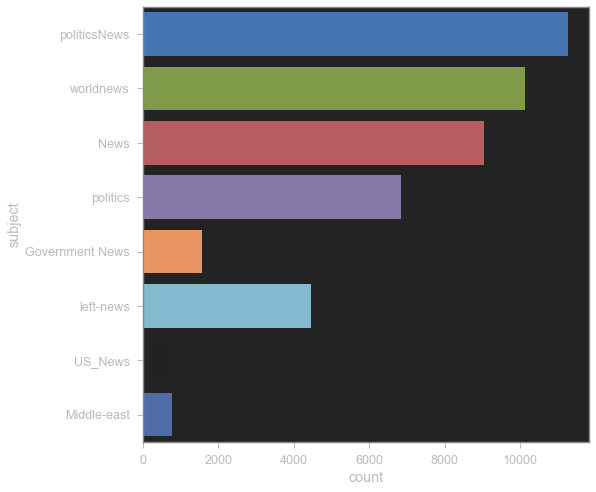

In [41]:
# plot the number of samples in 'subject'
plt.figure(figsize = (8, 8))
sns.countplot(y = "subject", data = df)
plt.show()

<AxesSubplot:xlabel='target', ylabel='count'>

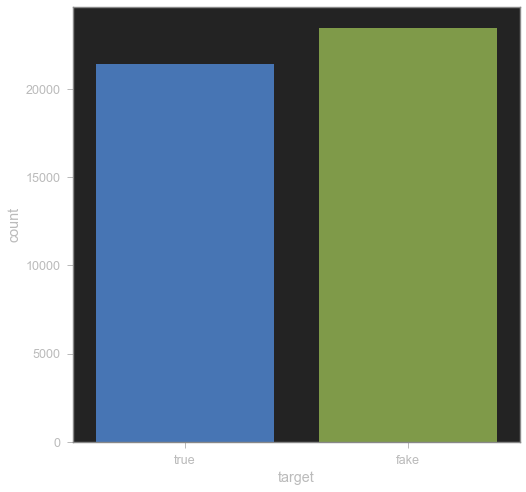

In [42]:
plt.figure(figsize = (8, 8))
sns.countplot(x = "target", data = df)

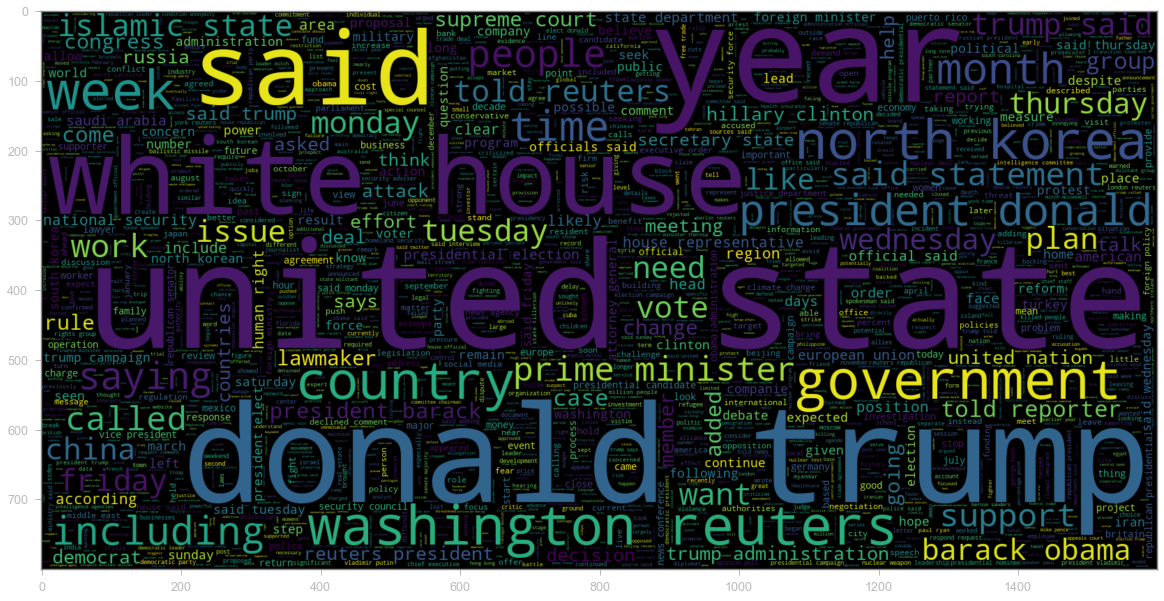

In [43]:
# plot the word cloud for text that is Real
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(df[df.target == "true"].clean_joined))
plt.imshow(wc, interpolation = 'bilinear')

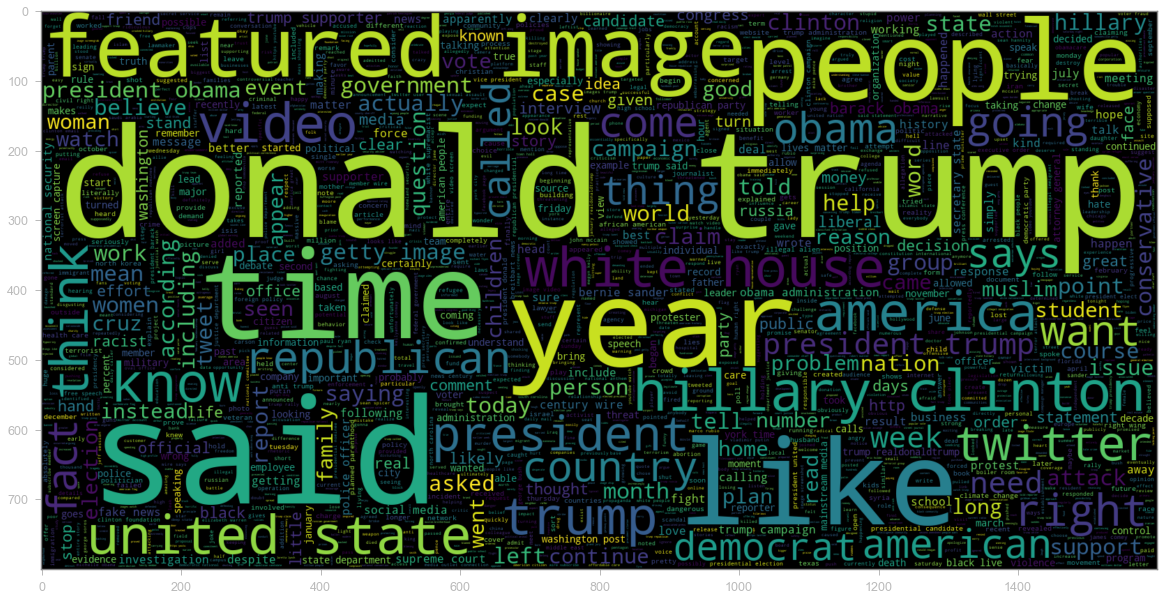

In [44]:
# plot the word cloud for text that is Fake
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(df[df.target == "fake"].clean_joined))
plt.imshow(wc, interpolation = 'bilinear')

In [45]:
nltk.word_tokenize(df['clean_joined'][2])

['senior',
 'republican',
 'senator',
 'mueller',
 'washington',
 'reuters',
 'special',
 'counsel',
 'investigation',
 'links',
 'russia',
 'president',
 'trump',
 'election',
 'campaign',
 'continue',
 'interference',
 'despite',
 'calls',
 'trump',
 'administration',
 'allies',
 'republican',
 'lawmakers',
 'shut',
 'prominent',
 'republican',
 'senator',
 'said',
 'sunday',
 'lindsey',
 'graham',
 'serves',
 'senate',
 'armed',
 'forces',
 'judiciary',
 'committees',
 'said',
 'department',
 'justice',
 'special',
 'counsel',
 'robert',
 'mueller',
 'needs',
 'carry',
 'russia',
 'investigation',
 'political',
 'interference',
 'investigation',
 'forward',
 'investigation',
 'conducted',
 'political',
 'influence',
 'graham',
 'said',
 'face',
 'nation',
 'news',
 'program',
 'need',
 'mueller',
 'think',
 'right',
 'right',
 'time',
 'question',
 'russia',
 'interfered',
 'election',
 'trump',
 'campaign',
 'links',
 'ordinated',
 'effort',
 'loomed',
 'white',
 'house',
 'trump',

In [46]:
# length of maximum document will be needed to create word embeddings 
maxlen = -1
for doc in df.clean_joined:
    tokens = nltk.word_tokenize(doc)
    if(maxlen<len(tokens)):
        maxlen = len(tokens)
print("The maximum number of words in any document is =", maxlen)

The maximum number of words in any document is = 4405


In [47]:
# visualize the distribution of number of words in a text
import plotly.express as px
fig = px.histogram(x = [len(nltk.word_tokenize(x)) for x in df.clean_joined], nbins = 100)
fig.show()

In [48]:
# Most frequent words counter (Code adapted from https://www.kaggle.com/rodolfoluna/fake-news-detector)   
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

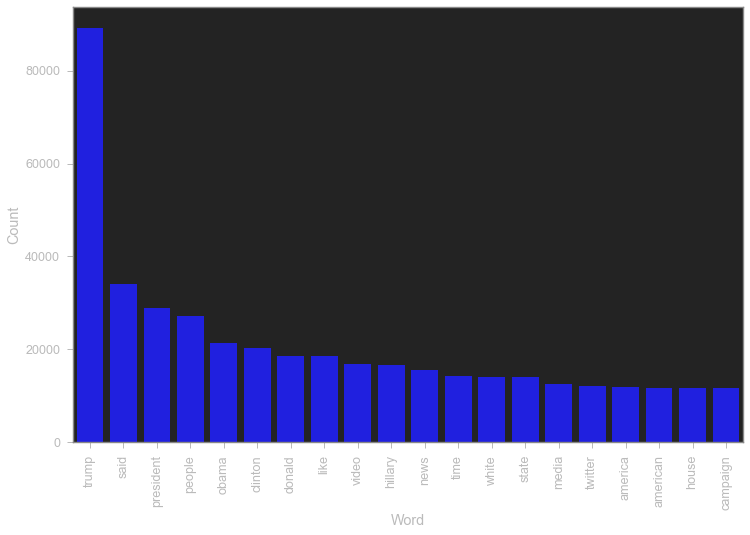

In [49]:
# Most frequent words in fake news
counter(df[df["target"] == "fake"], "clean_joined", 20)

PREPARE THE DATA BY PERFORMING TOKENIZATION AND PADDING

In [50]:
# split data into "train" and "test" 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.clean_joined, df.target, test_size = 0.2)

In [51]:
from nltk import word_tokenize

In [52]:
# Create a tokenizer to tokenize the words and create sequences of tokenized words
tokenizer = Tokenizer(num_words = total_words)
tokenizer.fit_on_texts(X_train)
train_sequences = tokenizer.texts_to_sequences(X_train)
test_sequences = tokenizer.texts_to_sequences(X_test)

In [53]:
len(train_sequences)

35918

In [54]:
len(test_sequences)

8980

In [55]:
print("The encoding for document\n",df.clean_joined[0],"\n is : ",train_sequences[0])

The encoding for document
 budget fight looms republicans flip fiscal script washington reuters head conservative republican faction congress voted month huge expansion national debt cuts called fiscal conservative sunday urged budget restraint keeping sharp pivot republicans representative mark meadows speaking face nation drew hard line federal spending lawmakers bracing battle january return holidays wednesday lawmakers begin trying pass federal budget fight likely linked issues immigration policy november congressional election campaigns approach republicans seek control congress president donald trump republicans want budget increase military spending democrats want proportional increases defense discretionary spending programs support education scientific research infrastructure public health environmental protection trump administration willing going increase defense discretionary spending percent meadows chairman small influential house freedom caucus said program democrats say

In [56]:
# Add padding can either be maxlen = 4406 or smaller number maxlen = 40 seems to work well based on results
padded_train = pad_sequences(train_sequences,maxlen = 40, padding = 'post', truncating = 'post')
padded_test = pad_sequences(test_sequences,maxlen = 40, truncating = 'post') 

In [57]:
for i,doc in enumerate(padded_train[:2]):
     print("The padded encoding for document",i+1," is : ",doc)

The padded encoding for document 1  is :  [  182  1667  1487  2422   297   490   277   779   374    42  1327    42
     4    18   182    47 13351   674  2015   285   806    31   159  1371
   141  6425  2243  4524  2015    42   427   459 13494   891   163   515
  2175  4955   860   629]
The padded encoding for document 2  is :  [ 5540 22485   173  5775  1112  5729  1183     1   263  2029   571    10
     1     3   159   873 22485  5540   282  1449   755  1112    16    12
    74   159    61   483     1  4346  8625   315 24078   282  3921  2298
   786   183  2037    54]


In [58]:
X_test.head()

35305    rubio sides democrats giving whopping billion ...
29180    cruz says endorsing trump grave mistake promis...
29805    responsible owner road rages threatens shoot m...
38237    teacher union protest gets ugly protesters cop...
5099     etihad advises checks missions trump order dub...
Name: clean_joined, dtype: object

BUILD AND TRAIN THE MODEL

In [59]:
# # Sequential Model
# model = Sequential()

# # embeddidng layer
# model.add(Embedding(total_words, output_dim = 128))
# # model.add(Embedding(total_words, output_dim = 240))


# # Bi-Directional RNN and LSTM
# model.add(Bidirectional(LSTM(128)))

# # Dense layers
# model.add(Dense(128, activation = 'relu'))
# model.add(Dense(1,activation= 'sigmoid'))
# # model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
# # model.summary()

In [60]:
# Function to plot the confusion matrix (code from https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [71]:
y_train.value_counts()

fake    18811
true    17107
Name: target, dtype: int64

In [72]:
y_test.value_counts()

fake    4670
true    4310
Name: target, dtype: int64

In [81]:
# LOGISTIC REGRESSION
# Vectorizing and applying TF-IDF
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

import time
start = time.time()

pipe_regression = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

# Fitting the model
model_regression = pipe_regression.fit(X_train, y_train)

# Accuracy
prediction_regression = model_regression.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction_regression)*100,2))) 
end = time.time()
print(end - start)


accuracy: 98.64%
17.65431237220764


In [80]:
from sklearn.ensemble import GradientBoostingClassifier
import time
start = time.time()

pipe_gradient = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', GradientBoostingClassifier())])

# Fitting the model
model_gradient = pipe_gradient.fit(X_train, y_train)

# Accuracy
prediction_gradient = model_gradient.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction_gradient)*100,2))) 
end = time.time()
print(end - start)


accuracy: 99.59%
233.56830620765686


In [67]:
model_regression.predict_proba(X_test)[:, 1]

array([1.67235781e-05, 4.61991368e-03, 4.61991368e-03, ...,
       9.91211211e-01, 9.85821276e-01, 4.61991368e-03])

In [82]:

roc_auc_score(y_test, model_regression.predict_proba(X_test)[:, 1])

0.9978608584189947

In [70]:
# RANDOM FOREST CLASSIFIER
from sklearn.ensemble import RandomForestClassifier

pipe_random = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=200, criterion="entropy"))])

model_random = pipe_random.fit(X_train, y_train)
prediction = model_random.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
end = time.time()
print(end - start)

accuracy: 99.16%
713.530415058136


In [73]:
df.iloc[4].original

"Trump wants Postal Service to charge 'much more' for Amazon shipments SEATTLE/WASHINGTON (Reuters) - President Donald Trump called on the U.S. Postal Service on Friday to charge “much more” to ship packages for Amazon (AMZN.O), picking another fight with an online retail giant he has criticized in the past.     “Why is the United States Post Office, which is losing many billions of dollars a year, while charging Amazon and others so little to deliver their packages, making Amazon richer and the Post Office dumber and poorer? Should be charging MUCH MORE!” Trump wrote on Twitter.  The president’s tweet drew fresh attention to the fragile finances of the Postal Service at a time when tens of millions of parcels have just been shipped all over the country for the holiday season.  The U.S. Postal Service, which runs at a big loss, is an independent agency within the federal government and does not receive tax dollars for operating expenses, according to its website.  Package delivery has 

In [98]:
input_text = ["The United States is going to invade Canada"]

In [74]:
df.target.value_counts()

fake    23481
true    21417
Name: target, dtype: int64

In [75]:
model.predict([df.iloc[4].original])

array(['true'], dtype=object)

In [83]:
df.shape

(44898, 8)

In [76]:
X_test.shape

(8980,)

In [ ]:
pd.set_option('max_colwidth', 500)



In [77]:
X_test.iloc[0]

'rubio sides democrats giving whopping billion zika virus prevention democrats want spend whopping billion zika virus prevention republicans demanding controls rubio calling stingy federal dollars republican months running conservative candidates presidential race marco rubio embracing democrats calls open federal checkbook dole billions dollars money combat zika virus tacking debt rubio home state florida risk outbreak sponsoring legislation fully fund president obama nearly billion emergency spending request blasted fellow republicans stingy demanding proof controls rubio finishing term ditching senate year said spending offset fine fine tacking debt leaving times public health emergencies like natural disasters delay acting figure agree going parts budget said floor speech week rubio gives democrats political cover congress prepares fight week mosquito borne zika virus health experts breakout fear looming summer heats house released plan monday allocate million zika taking money exi

In [99]:
input_text

['The United States is going to invade Canada']

In [100]:
model.predict(input_text)

array(['fake'], dtype=object)

In [101]:
model_regression.predict([df.iloc[4].original])

array(['true'], dtype=object)

Confusion matrix, without normalization


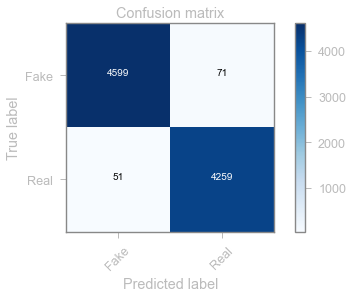

In [97]:
cm = metrics.confusion_matrix(y_test, prediction_regression)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [89]:
print(X_test)

35305    rubio sides democrats giving whopping billion ...
29180    cruz says endorsing trump grave mistake promis...
29805    responsible owner road rages threatens shoot m...
38237    teacher union protest gets ugly protesters cop...
5099     etihad advises checks missions trump order dub...
                               ...                        
37781    missing file boxes clinton mails evidence tamp...
2275     trump twitter fake news senator richard blumen...
19324    ireland says work needed phase brexit talks du...
1178     house panel sets puerto rico recovery hearing ...
34472    identity hillary mystery handler finally revea...
Name: clean_joined, Length: 8980, dtype: object


In [96]:
# Save the trained model

import pickle
pickle.dump(model_regression, open('trained_regression_model.pkl', 'wb'))


In [ ]:
# # Dense layers
# model.add(Dense(128, activation = 'relu'))
# model.add(Dense(1,activation= 'sigmoid'))
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['auroc'])
# model.summary()

ASSESS TRAINED MODEL PERFORMANCE

In [ ]:
# make prediction
#pred = model.predict(padded_test)

In [ ]:
# if the predicted value is >0.5 it is real else it is fake
# prediction = []
# for i in range(len(pred)):
#     if pred[i].item() > 0.5:
#         prediction.append(1)
#     else:
#         prediction.append(0)